In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [5]:
df['label'].value_counts()/len(df)*100
# Imbalanced dataset

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [6]:
ham =df[df['label']=='ham']
spam =df[df['label']=='spam']

In [7]:
ham.shape

(4825, 4)

In [8]:
spam.shape

(747, 4)

In [9]:
ham1 =ham.sample(spam.shape[0])

In [10]:
ham1.shape

(747, 4)

In [11]:
# when your doing text analytics you can do undersampling

In [12]:
# balance your data where target value is spam or ham

In [13]:
data =ham1.append(spam,ignore_index=True)

In [14]:
data.shape

(1494, 4)

In [15]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

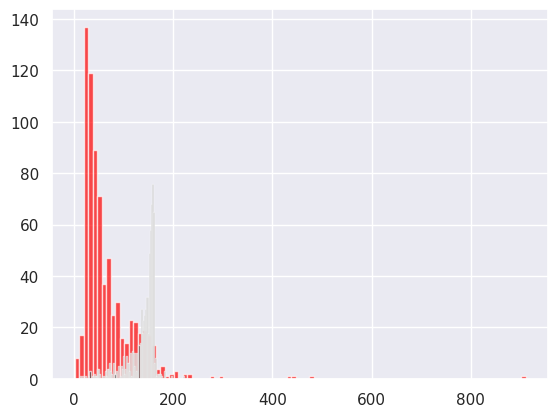

In [16]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7,color='red')
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7,color='black')
plt.show()

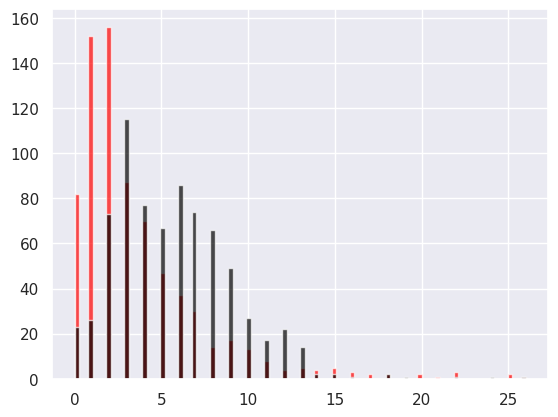

In [17]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7,color='red')
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7,color='black')
plt.show()


In [18]:
# split the data into training and testing data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
data['label'].shape

(1494,)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0)

In [22]:
# Build NLP model to ensure your text variable get change into vector form

In [23]:
# Text analytics using spam detection

# Text analytics using spam detection

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# Maching learning model

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pipeline package to merge NLP and Machine learning Together and get the output
from sklearn.pipeline import Pipeline

In [27]:
# Random Forest Clssifier

In [28]:
classifier = Pipeline([('TF-IDF',TfidfVectorizer()),('Classifier',RandomForestClassifier())])

In [29]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [30]:
# Prediction done using train and test data

y_pred_train =classifier.predict(X_train)
y_pred_test =classifier.predict(X_test)


In [31]:
# Evaluation Matrix

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [33]:
confusion_matrix(y_train,y_pred_train)

array([[520,   0],
       [  0, 525]])

In [34]:
confusion_matrix(y_test,y_pred_test)

array([[225,   2],
       [ 21, 201]])

In [35]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       520
        spam       1.00      1.00      1.00       525

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



In [36]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [37]:
print(accuracy_score(y_test,y_pred_test))
# Test accuracy

0.9487750556792873


In [38]:
print(accuracy_score(y_train,y_pred_train))
# train accuracy

1.0


In [39]:
# SVM

  SVM classifier

In [40]:
classifier1 = Pipeline([('TF-IDF',TfidfVectorizer()),('Classifier',SVC(C=1.0))])

In [41]:
classifier1.fit(X_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('Classifier', SVC())])

In [42]:
# Prediction done using train and test data

y_pred_train1 =classifier1.predict(X_train)
y_pred_test1 =classifier1.predict(X_test)

In [43]:
print(accuracy_score(y_test,y_pred_test1))
# Test accuracy

0.9599109131403119


In [44]:
print(accuracy_score(y_train,y_pred_train1))
# Train accuracy

0.999043062200957


In [45]:
# XGBoost Method

In [46]:
# When there is a problem of high variance then it i better to go with the random forest and if there is problem of high bias then better to prefer XGBoost method

In [47]:
data['label'] =np.where(data['label']=='ham',0,1)

In [48]:
data.head()

,label,message,length,punct
0,0,K I'll be sure to get up before noon and see w...,56,2
1,0,Want to finally have lunch today?,33,1
2,0,"Tonight? Yeah, I'd be down for that",35,3
3,0,WHORE YOU ARE UNBELIEVABLE.,27,1
4,0,Tell your friends what you plan to do on Valen...,69,5


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1494 non-null   int64 
 1   message  1494 non-null   object
 2   length   1494 non-null   int64 
 3   punct    1494 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 46.8+ KB


In [50]:
data['label'].value_counts()

0    747
1    747
Name: label, dtype: int64

In [51]:
pip install xgboost

In [52]:
from xgboost import XGBClassifier


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1494 non-null   int64 
 1   message  1494 non-null   object
 2   length   1494 non-null   int64 
 3   punct    1494 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 46.8+ KB


In [54]:
data['label'].value_counts()

0    747
1    747
Name: label, dtype: int64

In [57]:
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0)

In [58]:
classifier2 = Pipeline([('TF-IDF',TfidfVectorizer()),('Classifier',XGBClassifier())])

In [59]:
classifier2.fit(X_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [62]:
# Prediction done using train and test data

y_pred_train2 =classifier2.predict(X_train)
y_pred_test2 =classifier2.predict(X_test)

In [63]:
print(accuracy_score(y_train,y_pred_train2))
# Train accuracy

0.9952153110047847


In [64]:
print(accuracy_score(y_test,y_pred_test2))
# Test accuracy

0.9265033407572383


In [65]:
# random forest is good model

## Without balancing data ,we wanted to explore

In [66]:
# Without balancing data ,we wanted to explore
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [67]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [68]:
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.3,random_state=0)

In [70]:
classifier4 = Pipeline([('TF-IDF',TfidfVectorizer()),('Classifier',RandomForestClassifier())])

In [71]:
classifier4.fit(X_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [72]:
# Prediction done using train and test data

y_pred_train3 =classifier4.predict(X_train)
y_pred_test3 =classifier4.predict(X_test)

In [74]:
print(accuracy_score(y_train,y_pred_train3))
# Train accuracy

1.0


In [75]:
print(accuracy_score(y_test,y_pred_test3))
# Test accuracy

0.9754784688995215


In [76]:
print(classification_report(y_train,y_pred_train3))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3374
        spam       1.00      1.00      1.00       526

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900



In [77]:
print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1451
        spam       1.00      0.81      0.90       221

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

